<a href="https://colab.research.google.com/github/mskhan1103/Deep-Learning/blob/main/ANN/Iris_dataset_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Step 3: Preprocess the dataset
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target labels
ohe = OneHotEncoder(sparse_output=False)
y_encoded = ohe.fit_transform(y.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (120, 4)
Testing set shape: (30, 4)


In [4]:
# Step 4: Build ANN architecture
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # hidden layer 1
    Dense(12, activation='relu'),                                   # hidden layer 2
    Dense(3, activation='softmax')                                  # output layer (3 classes)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323 (1.26 KB)

 Trainable params: 323 (1.26 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Step 5: Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3082 - loss: 1.0915 - val_accuracy: 0.2500 - val_loss: 1.1164
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3528 - loss: 1.0126 - val_accuracy: 0.2500 - val_loss: 1.0648
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3603 - loss: 0.9619 - val_accuracy: 0.2500 - val_loss: 1.0220
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3622 - loss: 0.9207 - val_accuracy: 0.2500 - val_loss: 0.9850
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3137 - loss: 0.9292 - val_accuracy: 0.2500 - val_loss: 0.9535
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4379 - loss: 0.8595 - val_accuracy: 0.3333 - val_loss: 0.9256
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5484 - loss: 0.8412 - val_accuracy: 0.4583 - val_loss: 0.9003
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5943 - loss: 0.8128 - val_accuracy: 0.5000 - val_loss:

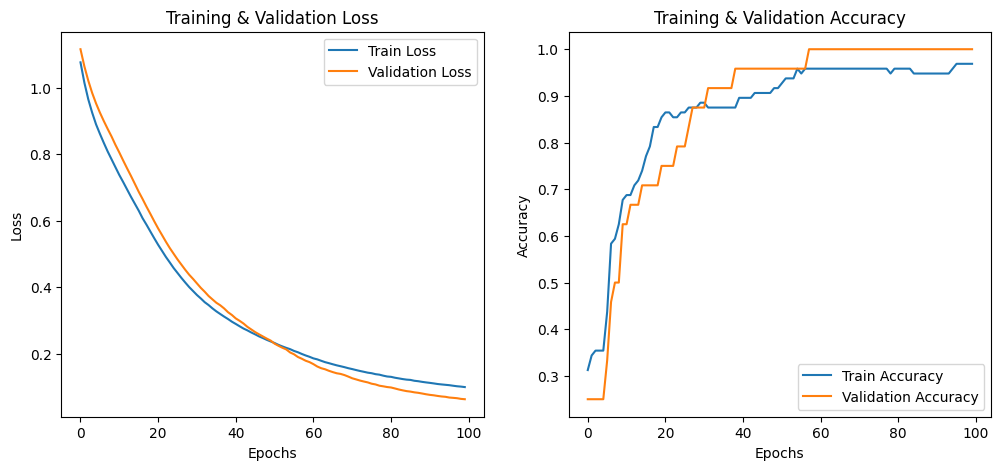

In [6]:
# Step 6: Plot loss and accuracy curves
plt.figure(figsize=(12,5))

# Plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [7]:
# Step 7: Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix and report
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=iris.target_names))


Test Accuracy: 0.9667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [8]:
# Step 8: Test on some random samples
sample_indices = [0, 3, 7]
samples = X_test[sample_indices]
true_labels = y_true[sample_indices]
pred_probs = model.predict(samples)
pred_labels = np.argmax(pred_probs, axis=1)

for i, idx in enumerate(sample_indices):
    print(f"Sample {i+1}")
    print(" True Label:", iris.target_names[true_labels[i]])
    print(" Predicted Label:", iris.target_names[pred_labels[i]])
    print(" Probabilities:", np.round(pred_probs[i], 3))
    print("-"*40)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Sample 1
 True Label: setosa
 Predicted Label: setosa
 Probabilities: [0.997 0.002 0.001]
----------------------------------------
Sample 2
 True Label: versicolor
 Predicted Label: versicolor
 Probabilities: [0.011 0.97  0.019]
----------------------------------------
Sample 3
 True Label: setosa
 Predicted Label: setosa
 Probabilities: [0.992 0.006 0.002]
----------------------------------------
